In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import time, datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

%matplotlib inline

In [3]:
df= pd.read_csv("berlinerstraße1520.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

In [5]:
my_date_range = pd.date_range('01-01-2017 00:00:00', periods = 105364, freq="30min", closed = "right")
df = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df["NO2 (µg/m³)"], "Temperatur (°C)": df["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df["Windrichtung (°)"]}) 

df["day"] = df["Time"].dt.date
df["month"]=df["Time"].dt.month
df["hour"] = df["Time"].dt.time
df['date'] = df['Time'].dt.strftime('%m-%d %H:%M-%S')


In [6]:
df_hourly=df.resample('H', on='Time').mean()#,how='mean')

In [8]:
my_date_range = pd.date_range('01-01-2017 00:00:00', periods = 52683, freq="H", closed = "right")
df_hourly = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_hourly["NO2 (µg/m³)"], "Temperatur (°C)": df_hourly["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_hourly["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df_hourly["Windrichtung (°)"]}) 

df_hourly["day"] = df_hourly["Time"].dt.date
df_hourly["month"]=df_hourly["Time"].dt.month
df_hourly["hour"] = df_hourly["Time"].dt.time
df_hourly['date'] = df_hourly['Time'].dt.strftime('%m-%d %H:%M-%S')

In [9]:
grouped_year= df_hourly.groupby("date")
df_year= grouped_year.mean()

In [11]:
my_date_range = pd.date_range('2019-12-31 23:00:00', periods = 8785, freq="H", closed = "right")
df_sep = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_year["NO2 (µg/m³)"], "Temperatur (°C)": df_year["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_year["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df_year["Windrichtung (°)"]}) 
df_sep["hour"] = df_sep["Time"].dt.time
df_sep["uhrzeit"] = df_sep["Time"].dt.hour
#df_sep['Time'].dt.strftime('%H:%M:%S')
#df_sep["uhrzeit"]=df_sep['Time'].dt.strftime('%H:%M:%S')

In [12]:
# aufteilen in 4 seasons

# spring
mask_spring = (df_sep['Time'] >= '2020-03-1 00:00:00') & (df_sep['Time'] <= '2020-05-31 23:30:00')
df_spring=df_sep.loc[mask_spring]
df_spring.to_csv("spring.csv")
# summer
mask_summer = (df_sep['Time'] >= '2020-06-1 00:00:00') & (df_sep['Time'] <= '2020-08-31 23:30:00')
df_summer=df_sep.loc[mask_summer]
# autumn
mask_autumn = (df_sep['Time'] >= '2020-09-1 00:00:00') & (df_sep['Time'] <= '2020-11-30 23:30:00')
df_autumn=df_sep.loc[mask_autumn]
# winter
mask_winter1 = (df_sep['Time'] >= '2020-12-1 00:00:00')& (df_sep['Time'] <= '2020-12-31 23:30:00') 
mask_winter2= (df_sep['Time']>='2020-01-1 00:00:00') & (df_sep['Time'] <= '2020-02-28 23:30:00')
df_winter1=df_sep.loc[mask_winter1]
df_winter2=df_sep.loc[mask_winter2]
df_winter= df_winter2.append([df_winter1])

In [13]:
conds=[]
time={0:'00:00:00',1:'01:00:00', 2:'02:00:00', 3:'03:00:00', 4:'04:00:00', 5:'05:00:00', 6:'06:00:00', 7:'07:00:00', 8:'09:00:00', 9:'09:00:00', 10:'10:00:00', 11:'11:00:00', 12:'12:00:00', 13:'13:00:00', 14:'14:00:00', 15:'15:00:00', 16:'16:00:00', 17:'17:00:00', 18:'18:00:00', 19:'19:00:00', 20:'20:00:00', 21:'21:00:00', 22:'22:00:00', 23:'23:00:00', 24:'24:00:00'}

for i in range(0,24):
    cond=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[i])
    conds.append(cond)
    
spring_hour=[]

for i in range(0,24):
    mask_hour = conds[i]
    df_spring_hour = df_spring.loc[mask_hour] 
    spring_hour.append(df_spring_hour)
    


In [14]:
## für jede Stunde

#Windgeschwindigkeit <2,5 m/s
wind_spring=[]

laenge_wind_spring=[]

for i in range(0,24):
    #df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]>=2.)
    df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=2.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=1.)
    #df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=0.)
            
    df_low_speed_spring = spring_hour[i].loc[df_speed]
    wind_spring.append(df_low_speed_spring)
for i in range(0,24):
    laenge_wind_spring.append(len(wind_spring[i]))

#laenge_no2_spring=[]
#no2_spring=[]
#no2_summer=[]
#no2_autumn=[]
#no2_winter=[]


#hohe NO2 Konzentrationen
#for i in range(0,24):
#    df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
    #df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
    #df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
#    df_high_no2 =wind_spring[i].loc[df_mask_no2]
#    no2_spring.append(df_high_no2)
#    laenge_no2_spring.append(len(no2_spring))
#df_high_no2.shape
#df_low_speed_spring.shape
lows=[]
laengelow=[]
mediums=[]
laengemedium=[]
highs=[]
laengehigh=[]

for i in range (0,24):
    low = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(0, 19.99999)]
    lows.append(low)
    laengelow.append(len(low))
    medium =wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(20, 39.99999)]
    mediums.append(medium)
    laengemedium.append(len(medium))
    high = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(40, 500)]
    highs.append(high)
    laengehigh.append(len(high))
    
    
    
    
    
prozente_low=[]
prozente_medium=[]
prozente_high=[]

anzahl_no2s_low=[]
anzahl_no2s_medium=[]
anzahl_no2s_high=[]


for i in range (0, 24):
    anzahl_ges= laenge_wind_spring[i]
    anzahl_no2_low=laengelow[i]
    anzahl_no2s_low.append(anzahl_no2_low)

    
    try:
        prozent_low=anzahl_no2s_low[i]/(anzahl_ges/100)
        prozente_low.append(prozent_low)
    except ZeroDivisionError:
        prozente_low.append(0.0) 
        
for i in range (0, 24):
    anzahl_ges= laenge_wind_spring[i]
    anzahl_no2_medium=laengemedium[i]
    anzahl_no2s_medium.append(anzahl_no2_medium)
    try:
    
        prozent_medium=anzahl_no2s_medium[i]/(anzahl_ges/100)
        prozente_medium.append(prozent_medium)
    
    except ZeroDivisionError:
        prozente_medium.append(0.0)

for i in range (0, 24):
    anzahl_ges=laenge_wind_spring[i]
    anzahl_no2_high=laengehigh[i]
    anzahl_no2s_high.append(anzahl_no2_high)
    
    try:
        prozent_high=anzahl_no2s_high[i]/(anzahl_ges/100)
        prozente_high.append(prozent_high)
    except ZeroDivisionError:
        prozente_high.append(0.0)
    
    
#for i in range (0,24):
#    anzahl_no2=len(no2_spring[i].index)
#    anzahl_no2s.append(anzahl_no2)
#    anzahl_ges=len(wind_spring[i].index)

    
#    try:
#        prozent= anzahl_no2/(anzahl_ges/100)
#        prozente.append(prozent)
#    except ZeroDivisionError:
#        prozente.append(0.0)

In [15]:
#Tabelle mit Prozenten:

my_date_range = pd.date_range('2019-12-31 23:00:00', periods = 25, freq="H", closed = "right")
df_tab = pd.DataFrame({'Time': my_date_range, 'Wahrscheinlichkeit low': prozente_low, "Wahrscheinlichkeit medium": prozente_medium, "Wahrscheinlichkeit high": prozente_high}) 
df_tab["uhrzeit"] = df_tab["Time"].dt.hour
df_tab["sum"]= df_tab["Wahrscheinlichkeit low"]+df_tab["Wahrscheinlichkeit medium"]+df_tab["Wahrscheinlichkeit high"]

In [16]:
df_tab

,Time,Wahrscheinlichkeit low,Wahrscheinlichkeit medium,Wahrscheinlichkeit high,uhrzeit,sum
0,2020-01-01 00:00:00,41.269841,58.730159,0.000000,0,100.0
1,2020-01-01 01:00:00,67.213115,31.147541,1.639344,1,100.0
2,2020-01-01 02:00:00,67.924528,32.075472,0.000000,2,100.0
3,2020-01-01 03:00:00,80.357143,19.642857,0.000000,3,100.0
4,2020-01-01 04:00:00,82.812500,17.187500,0.000000,4,100.0
5,2020-01-01 05:00:00,85.454545,14.545455,0.000000,5,100.0
6,2020-01-01 06:00:00,82.142857,17.857143,0.000000,6,100.0
7,2020-01-01 07:00:00,46.000000,54.000000,0.000000,7,100.0
8,2020-01-01 08:00:00,2.985075,92.537313,4.477612,8,100.0
9,2020-01-01 09:00:00,2.985075,92.537313,4.477612,9,100.0


Text(0.5, 1.0, '')

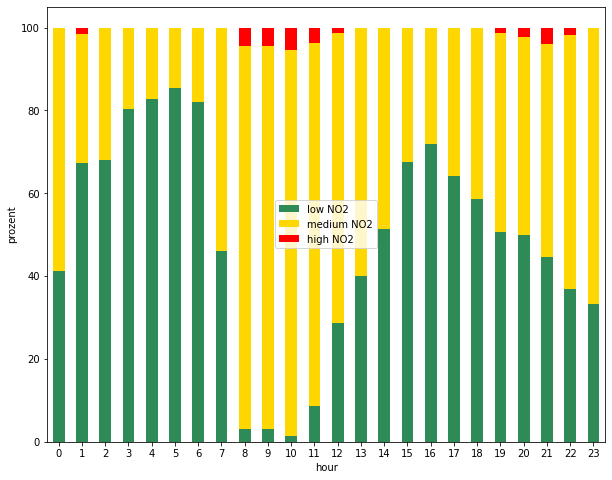

In [17]:
wahrscheinlichkeit_low=np.array(df_tab["Wahrscheinlichkeit low"])
wahrscheinlichkeit_medium=np.array(df_tab["Wahrscheinlichkeit medium"])
wahrscheinlichkeit_high=np.array(df_tab["Wahrscheinlichkeit high"])

dates=np.array(df_tab["uhrzeit"])
#dates = pd.date_range('1/1/2000 00:00:00', periods=24)
df_bar= pd.DataFrame({'low NO2': wahrscheinlichkeit_low,'medium NO2': wahrscheinlichkeit_medium,'high NO2': wahrscheinlichkeit_high, }, index=dates)
ax=df_bar.plot.bar(rot=0, stacked=True, figsize=(10,8),  color={"low NO2": "seagreen", "medium NO2": "gold", "high NO2":"red"})
#ax=df_bar.plot.bar(rot=0, figsize=(14,10), color={"low NO2": "seagreen", "medium NO2": "gold", "high NO2":"red"})
#df_tab.plot.bar(x="Time", y=["Wahrscheinlichkeit low", "Wahrscheinlichkeit medium", "Wahrscheinlichkeit high"])
ax.set_ylabel('prozent')
ax.set_xlabel('hour')
ax.set_title('')
#ax.set_title('')
#ax.set_title('')
#plt.savefig("bar_spring_0-1ms")
#plt.savefig("bar_spring_1-2ms")
#plt.savefig("bar_spring_2<ms")


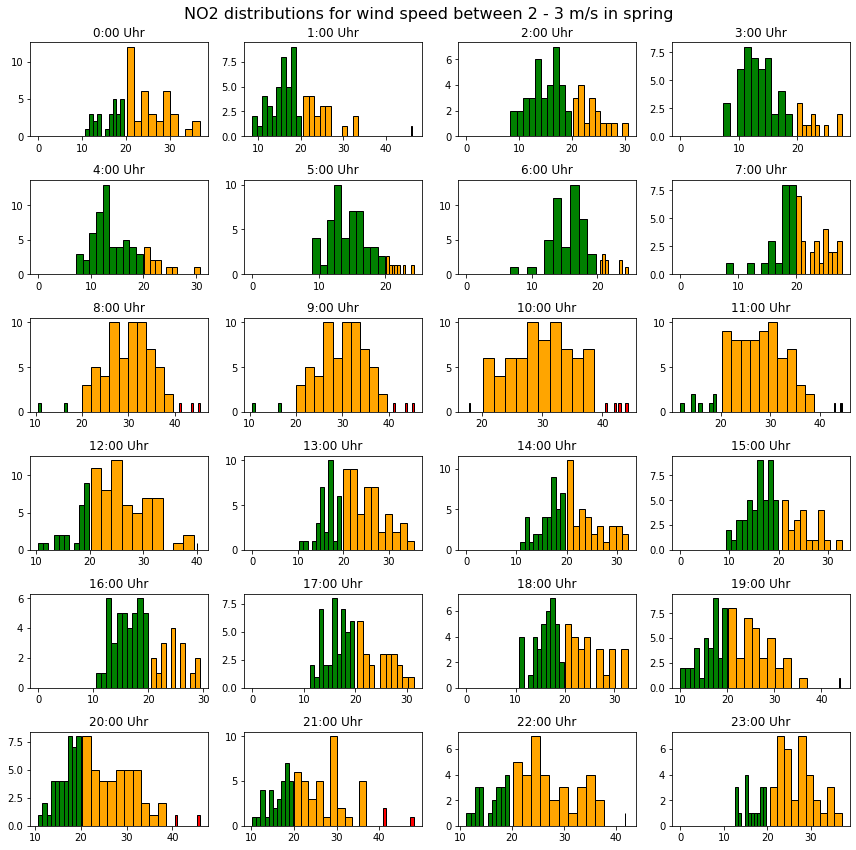

In [18]:
nrows = 6
ncols = 4

fig, axes=plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))
fig.suptitle("NO2 distributions for wind speed between 2 - 3 m/s in spring", fontsize=16)
hour = 0
for i in range(nrows):
    for j in range(ncols):
        
        axes[i, j].hist(lows[hour]["NO2 (µg/m³)"], edgecolor="black", color="green", label="0-20")
        axes[i, j].hist(mediums[hour]["NO2 (µg/m³)"], edgecolor="black", color="orange", label="20-40")
        axes[i, j].hist(highs[hour]["NO2 (µg/m³)"], edgecolor="black", color="red", label=">40")
        axes[i, j].set_title(f"{hour}:00 Uhr")
        #axes[i, j]. x achse gleicher Abstand
        #axes[i, j].axis("off")
        hour += 1
fig.tight_layout()       
      #  plt.savefig("hist2_3_spring")